In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('project_data2.csv', delimiter= ',')
feature_selected = [2, 3, 4, 5, 10]

In [3]:
data.head()

,amount,duration,payments,neg_balance,min_balance,mean_balance,gender,DB_mo,DB_dy,age,label
0,96396,12,8033,20.0,-12554.8,34233.780050,0,7,22,53,1
1,165960,36,4610,1.0,-1573.9,35762.639428,1,7,22,32,0
2,127080,60,2118,0.0,0.0,26159.043594,1,6,2,64,0
3,105804,36,2939,0.0,0.0,29682.440870,0,4,20,60,0
4,274740,60,4579,1.0,-11383.7,45677.095789,1,9,7,22,0


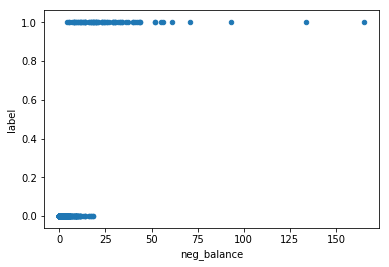

In [4]:
data.plot.scatter('neg_balance', 'label')

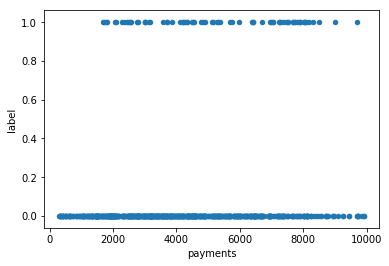

In [5]:
data.plot.scatter('payments', 'label')

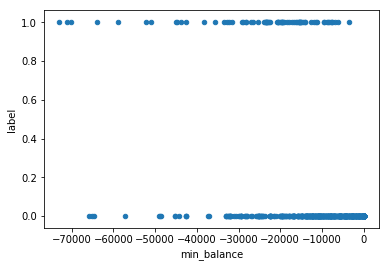

In [6]:
data.plot.scatter('min_balance', 'label')

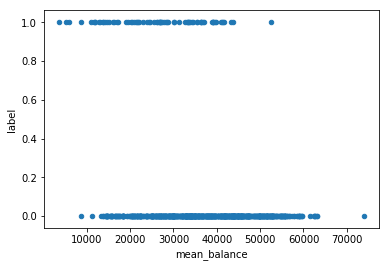

In [7]:
data.plot.scatter('mean_balance', 'label')

In [8]:
selected_df = data.iloc[:, feature_selected]

In [9]:
selected_df.head()

,payments,neg_balance,min_balance,mean_balance,label
0,8033,20.0,-12554.8,34233.780050,1
1,4610,1.0,-1573.9,35762.639428,0
2,2118,0.0,0.0,26159.043594,0
3,2939,0.0,0.0,29682.440870,0
4,4579,1.0,-11383.7,45677.095789,0


In [10]:
selected_df.corr()

,payments,neg_balance,min_balance,mean_balance,label
payments,1.000000,0.147402,-0.146539,0.101912,0.156414
neg_balance,0.147402,1.000000,-0.402735,-0.315994,0.687076
min_balance,-0.146539,-0.402735,1.000000,-0.048809,-0.420583
mean_balance,0.101912,-0.315994,-0.048809,1.000000,-0.268391
label,0.156414,0.687076,-0.420583,-0.268391,1.000000


In [11]:
total = selected_df.values

In [12]:
X_total = total[:, :-1]
y_total = total[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.2)

In [14]:
train_true_index = y_train == 1

In [15]:
train_false_index = y_train == 0

In [16]:
X_train_true = X_train[train_true_index, :]

In [17]:
X_train_true.shape

(62, 4)

In [18]:
X_train_false = X_train[train_false_index, :]

# Procedure

In [95]:
def data_tranform(data):
    result = data.copy()
    result[:, 0] = normalize(result[:, 0] ** 0.6)
    result[:, 1] = normalize(np.log(result[:, 1] + 1))
    result[:, 2] = normalize(np.log(-result[:, 2] + 100))
    result[:, 3] = normalize(result[:, 3] ** 0.5)
    return result

In [96]:
def normalize(arr):
    arr= np.array(arr)
    return (arr - arr.mean()) / arr.var()

In [97]:
def get_cov_matrix(data):
    df = pd.DataFrame(data)
    cov = df.cov()
    return cov.values

In [98]:
def get_mean(data):
    return np.mean(data, axis=0)

In [124]:
def get_multi_gaussian(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = np.linalg.det(sigma)
        if det == 0:
            print("The covariance matrix cannot be signular, now it has value of 0.1")
            det = 0.1
        
        norm_const = 1 / ((2 * 3.1415) ** (size / 2) * det **0.5)
        x_mu = (x - mu).reshape((1, size))
        inv = np.linalg.inv(sigma)
        result = np.exp(-0.5 * (x_mu.dot(inv)).dot(x_mu.T))
        return norm_const * result

In [144]:
def predict(vect, true_prior, false_prior, true_cov, false_cov, true_mean, false_mean):
    label = 0
    prob_true = true_prior * get_multi_gaussian(vect, true_mean, true_cov)
    prob_false = false_prior * get_multi_gaussian(vect, false_mean, false_cov)
    if prob_true > prob_false:
        label = 1
    else:
        label = 0
    return label

In [147]:
def get_accuracy(y_true, y_predict):
    return sum(y_true == y_predict) / (len(y_true))

In [174]:
def get_precision(y_true, y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    true_pos_and_false_pos = sum(y_predict)
    
    pred_pos_index = y_predict == 1
    true_pos_num = sum(y_true[pred_pos_index] == 1)
    return true_pos_num / true_pos_and_false_pos

In [175]:
def get_recall(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true_index = y_true == 1
    total_1_in_truth= sum(y_true)
    total_positive_true = sum(y_pred[y_true_index] == 1)
    return total_positive_true / total_1_in_truth

In [176]:
get_precision(np.array([0,0,0,0,1,1]), np.array([0,0,0,1,1,1]))

0.6666666666666666

In [111]:
trans_formed = data_tranform(total)

In [112]:
X_total_trans = trans_formed[:, :-1]
y_total_trans = trans_formed[:, -1]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_total_trans, y_total_trans, test_size = 0.2)

In [114]:
X_train_true = X_train[y_train == 1, :]

In [115]:
X_train_false = X_train[y_train == 0, :]

In [121]:
true_cov_mat = get_cov_matrix(X_train_true)
false_cov_mat = get_cov_matrix(X_train_false)
true_mean_vec = get_mean(X_train_true)
false_mean_vec = get_mean(X_train_false)
true_prior = y_train.sum() / len(y_train)
false_prior = 1 - true_prior

In [145]:
y_pred_train = [predict(X_train[i], true_prior, false_prior, true_cov_mat, false_cov_mat, true_mean_vec, false_mean_vec) for i in range(X_train.shape[0])]

In [146]:
y_pred_test = [predict(X_test[i], true_prior, false_prior, true_cov_mat, false_cov_mat, true_mean_vec, false_mean_vec) for i in range(X_test.shape[0])]

In [171]:
train_recall = get_recall(y_train, y_pred_train)
train_recall

0.9310344827586207

In [177]:
train_precision = get_precision(y_train, y_pred_train)
train_precision

0.6585365853658537

In [172]:
test_recall = get_recall(y_test, y_pred_test)
test_recall

0.8333333333333334

In [178]:
test_precision = get_precision(y_test, y_pred_test)
test_precision

0.6818181818181818

In [180]:
f1_train = 2 * (train_precision * train_recall) / (train_precision + train_recall)
f1_train

0.7714285714285715

In [181]:
f1_test = 2 * (test_precision * test_recall) / (test_precision + test_recall)
f1_test

0.7499999999999999

# Evaluation

In [150]:
train_accuracy = get_accuracy(y_train, y_pred_train)
train_accuracy

0.9515885022692889

In [151]:
test_accuracy = get_accuracy(y_test, y_pred_test)
test_accuracy

0.9397590361445783

# Assumption Examination

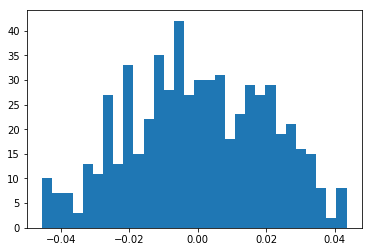

In [84]:
i = 0
payment_0_data = (X_train_false[:, i]) ** 0.6
payment_0_data = normalize(payment_0_data)
plt.hist(payment_0_data, bins = 30);


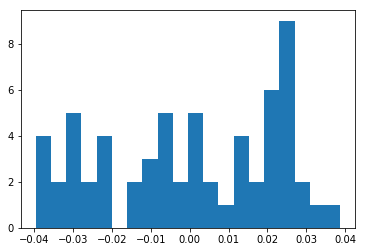

In [85]:
i = 0
payment_1_data = (X_train_true[:, i]) ** 0.6
payment_1_data = normalize(payment_1_data)
plt.hist(payment_1_data, bins = 20);

# Number of Neg Balance

(array([219., 172.,  75.,  44.,  35.,  22.,  22.,  10.]),
 array([-1.40839631, -0.71081563, -0.01323495,  0.68434572,  1.3819264 ,
         2.07950708,  2.77708775,  3.47466843,  4.17224911]),
 <a list of 8 Patch objects>)

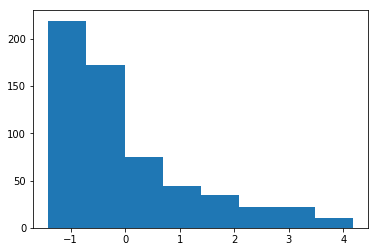

In [86]:
i = 1
num_balance_0 = np.log(X_train_false[:, i] + 1)
num_balance_0 = normalize(num_balance_0)
plt.hist(num_balance_0, bins = 8)

(array([ 3.,  5.,  5., 12., 13., 10.,  9.,  2.,  1.,  2.]),
 array([-3.20046481, -2.48333405, -1.76620329, -1.04907253, -0.33194178,
         0.38518898,  1.10231974,  1.81945049,  2.53658125,  3.25371201,
         3.97084277]),
 <a list of 10 Patch objects>)

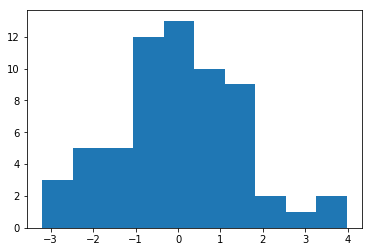

In [89]:
i = 1
num_balance_1 = np.log(X_train_true[:, i] + 1)
num_balance_1 = normalize(num_balance_1)
plt.hist(num_balance_1, bins = 10)

# Min Balance

(array([224.,   5.,   9.,  15.,  23.,  66.,  73., 107.,  66.,  11.]),
 array([-0.53380692, -0.40566498, -0.27752304, -0.1493811 , -0.02123916,
         0.10690278,  0.23504472,  0.36318665,  0.49132859,  0.61947053,
         0.74761247]),
 <a list of 10 Patch objects>)

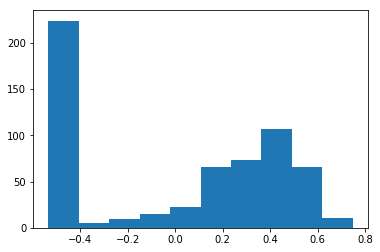

In [90]:
i = 2
min_balance_0 = np.log(-X_train_false[:, i] + 100)
min_balance_0 = normalize(min_balance_0)
plt.hist(min_balance_0, bins = 10)

(array([ 1.,  1.,  7., 13., 15., 13.,  7.,  5.]),
 array([-4.83562065, -3.78819886, -2.74077707, -1.69335528, -0.64593349,
         0.40148831,  1.4489101 ,  2.49633189,  3.54375368]),
 <a list of 8 Patch objects>)

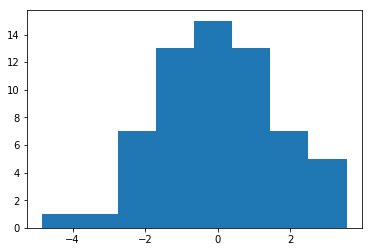

In [91]:
i = 2
min_balance_1 = np.log(-X_train_true[:, i] + 100)
min_balance_1 = normalize(min_balance_1)
plt.hist(min_balance_1, bins = 8)

# Mean Balance

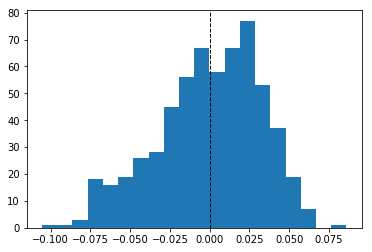

In [92]:
i = 3
mean_balance_0 = X_train_false[:, i] ** 0.5
mean_balance_0 = normalize(mean_balance_0)
plt.hist(mean_balance_0, bins = 20);
plt.axvline(mean_balance_0.mean(), color='k', linestyle='dashed', linewidth=1)

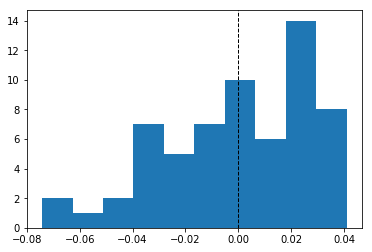

In [94]:
i = 3
mean_balance_1 = normalize(X_train_true[:, i] ** 0.5)
plt.hist(mean_balance_1, bins = 10)
plt.axvline((mean_balance_1).mean(), color='k', linestyle='dashed', linewidth=1)

In [151]:
def get_cov_matrix(data):
    df = pd.DataFrame(data)
    cov = df.cov()
    return cov.values

In [156]:
def get_mean(data):
    return np.mean(data, axis=0)

In [152]:
X_train_false_cov = get_cov_matrix(X_train_false)
X_train_true_cov = get_cov_matrix(X_train_true)

In [157]:
X_train_false_mean = get_mean(X_train_false)
X_train_true_mean = get_mean(X_train_true)

In [158]:
X_train_false_mean

array([ 4.13770100e+03,  1.87541528e+00, -7.54589900e+03,  3.74836389e+04])